In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

epoch: 10, loss: 1243664.125
epoch: 20, loss: 1119234.0
epoch: 30, loss: 1003204.5
epoch: 40, loss: 895884.3125
epoch: 50, loss: 797240.75
epoch: 60, loss: 707020.6875
epoch: 70, loss: 624850.5
epoch: 80, loss: 550299.0
epoch: 90, loss: 482911.65625
epoch: 100, loss: 422228.03125
epoch: 110, loss: 367789.375
epoch: 120, loss: 319144.0
epoch: 130, loss: 275850.1875
epoch: 140, loss: 237478.171875
epoch: 150, loss: 203612.5625
epoch: 160, loss: 173853.71875
epoch: 170, loss: 147819.59375
epoch: 180, loss: 125147.1484375
epoch: 190, loss: 105493.171875
epoch: 200, loss: 88535.8515625
epoch: 210, loss: 73974.7109375
epoch: 220, loss: 61531.34765625
epoch: 230, loss: 50949.73046875
epoch: 240, loss: 41995.6328125
epoch: 250, loss: 34456.296875
epoch: 260, loss: 28139.96484375
epoch: 270, loss: 22874.873046875
epoch: 280, loss: 18508.224609375
epoch: 290, loss: 14905.072265625
epoch: 300, loss: 11947.046875
epoch: 310, loss: 9530.9921875
epoch: 320, loss: 7567.68798828125
epoch: 330, loss: 5

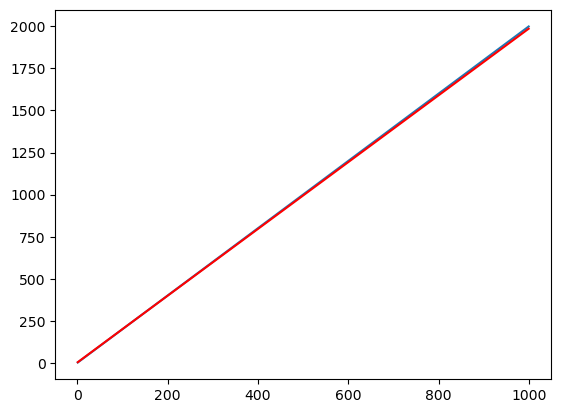

In [31]:
class LinearNet(nn.Module):
    def __init__(self, in_features, out_features, lr=0.01):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(in_features=in_features, out_features=out_features)
        self.optimizer = optim.Adam(self.parameters(), lr=lr)
        self.criterion = nn.MSELoss()

    def forward(self, x):
        return self.linear(x)

    def start_train(self, x, y, epochs=500):
        self.train()
        losses = []
        for _ in range(epochs):
            y_pred = self(x)
            loss = self.criterion(y_pred, y)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            losses.append(loss.item())
            if (_+1) % 10 == 0:
                print(f"epoch: {_ + 1}, loss: {loss}")

x = torch.arange(1, 1000, dtype=torch.float)
x = x.reshape(-1, 1)

y = 2*x + 1

net = LinearNet(in_features=1, out_features=1)
net.start_train(x, y)

y_pred = net(x)
y_pred = y_pred.detach().numpy()

from matplotlib import pyplot as plt
plt.figure()
plt.plot(x, y)
plt.plot(x, y_pred, color='red')
plt.show()


In [26]:
net

LinearNet(
  (linear): Linear(in_features=1, out_features=1, bias=True)
  (criterion): MSELoss()
)

In [28]:
print(net(x))

tensor([[   3.6345],
        [   5.6158],
        [   7.5970],
        [   9.5783],
        [  11.5596],
        [  13.5408],
        [  15.5221],
        [  17.5034],
        [  19.4846],
        [  21.4659],
        [  23.4471],
        [  25.4284],
        [  27.4097],
        [  29.3909],
        [  31.3722],
        [  33.3535],
        [  35.3347],
        [  37.3160],
        [  39.2972],
        [  41.2785],
        [  43.2598],
        [  45.2410],
        [  47.2223],
        [  49.2036],
        [  51.1848],
        [  53.1661],
        [  55.1474],
        [  57.1286],
        [  59.1099],
        [  61.0911],
        [  63.0724],
        [  65.0537],
        [  67.0349],
        [  69.0162],
        [  70.9975],
        [  72.9787],
        [  74.9600],
        [  76.9412],
        [  78.9225],
        [  80.9038],
        [  82.8850],
        [  84.8663],
        [  86.8475],
        [  88.8288],
        [  90.8101],
        [  92.7913],
        [  94.7726],
        [  96

epoch: 10, loss: 54040.34765625
epoch: 20, loss: 51368.796875
epoch: 30, loss: 48784.46484375
epoch: 40, loss: 46292.2109375
epoch: 50, loss: 43893.828125
epoch: 60, loss: 41589.125
epoch: 70, loss: 39376.76171875
epoch: 80, loss: 37254.87109375
epoch: 90, loss: 35221.3203125
epoch: 100, loss: 33273.875
epoch: 110, loss: 31410.2578125
epoch: 120, loss: 29628.19140625
epoch: 130, loss: 27925.384765625
epoch: 140, loss: 26299.568359375
epoch: 150, loss: 24748.466796875
epoch: 160, loss: 23269.830078125
epoch: 170, loss: 21861.4140625
epoch: 180, loss: 20520.99609375
epoch: 190, loss: 19246.361328125
epoch: 200, loss: 18035.3203125
epoch: 210, loss: 16885.701171875
epoch: 220, loss: 15795.3583984375
epoch: 230, loss: 14762.1640625
epoch: 240, loss: 13784.0244140625
epoch: 250, loss: 12858.8544921875
epoch: 260, loss: 11984.6240234375
epoch: 270, loss: 11159.3134765625
epoch: 280, loss: 10380.943359375
epoch: 290, loss: 9647.5732421875
epoch: 300, loss: 8957.2900390625
epoch: 310, loss: 83

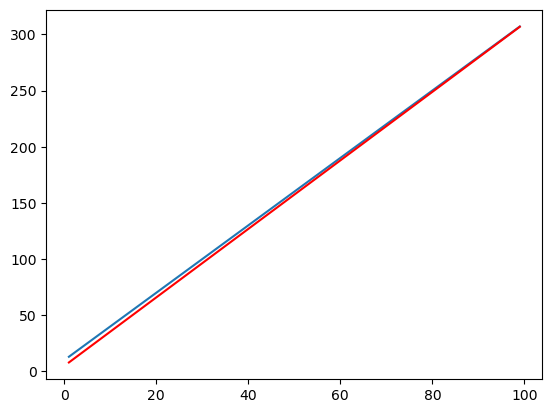

In [48]:
class LinearNet2(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearNet2, self).__init__()
        self.linear = nn.Linear(in_features=in_features, out_features=out_features)

    def forward(self, x):
        return self.linear(x)

model = LinearNet2(in_features=1, out_features=1)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

x_train = torch.arange(1, 100, dtype=torch.float)
x_train = x_train.reshape(-1, 1)
y_train = 3*x_train + 10

epochs = 1000
model.train()
losses = []
for _ in range(epochs):
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (_+1) % 10 == 0:
        print(f"epoch: {_ + 1}, loss: {loss}")

model.eval()
y_pred = model(x_train)
y_pred = y_pred.detach().numpy()

from matplotlib import pyplot as plt
plt.figure()
plt.plot(x_train, y_train)
plt.plot(x_train, y_pred, color='red')
plt.show()

In [50]:
device = torch.device("mps")
x_train = x_train.to(device)
print(x_train)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.],
        [51.],
        [52.],
        [53.],
        [54.],
        [55.],
        [56.],
        [57.],
        [58.],
        [59.],
        [60.],
        [61.],
        [62.],
        [63.],
        [64.],
        [65.],
        [66.],
        [6

In [53]:
model.to(device) ## 要在gpu上预测,除了数据要放到gpu上, model也要传到gpu上
y_pred = model(x_train)
print(y_pred) # 结果也是存放到gpu上

tensor([[  7.9083],
        [ 10.9573],
        [ 14.0064],
        [ 17.0555],
        [ 20.1045],
        [ 23.1536],
        [ 26.2026],
        [ 29.2517],
        [ 32.3008],
        [ 35.3498],
        [ 38.3989],
        [ 41.4480],
        [ 44.4970],
        [ 47.5461],
        [ 50.5951],
        [ 53.6442],
        [ 56.6933],
        [ 59.7423],
        [ 62.7914],
        [ 65.8404],
        [ 68.8895],
        [ 71.9386],
        [ 74.9876],
        [ 78.0367],
        [ 81.0857],
        [ 84.1348],
        [ 87.1839],
        [ 90.2329],
        [ 93.2820],
        [ 96.3311],
        [ 99.3801],
        [102.4292],
        [105.4782],
        [108.5273],
        [111.5764],
        [114.6254],
        [117.6745],
        [120.7235],
        [123.7726],
        [126.8217],
        [129.8707],
        [132.9198],
        [135.9688],
        [139.0179],
        [142.0670],
        [145.1160],
        [148.1651],
        [151.2142],
        [154.2632],
        [157.3123],


In [55]:
y_pred = y_pred.cpu().detach().numpy() ## 要存放到cpu, 必须调用cpu方法